In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [73]:
#suffixes = ['base', 'rp', 'pp']
types = {"base":"Natural Language", "rp":"Template: Replace", "pp":"Template: Prepended"}

In [74]:
rows= list()
for suff in types.keys():
    for i in range(1,6):
        file_name = f"SP_{suff}{i}.txt"
        try:
            with open(file_name, "r") as file:
                row = dict()
                row['type'] = types[suff]
                res =file.readlines()[-1]
                res = res.split(' ')[1:]
                for val in res:
                    split_val = val.split('=')
                    row[split_val[0]] = float(split_val[1].strip('%s'))
                rows.append(row)
                    
        except:
            pass
df = pd.DataFrame(rows)

In [75]:
means = df.groupby('type').mean()
stds = df.groupby('type').std()

In [76]:
cols = ['agree', 'comb_rew']

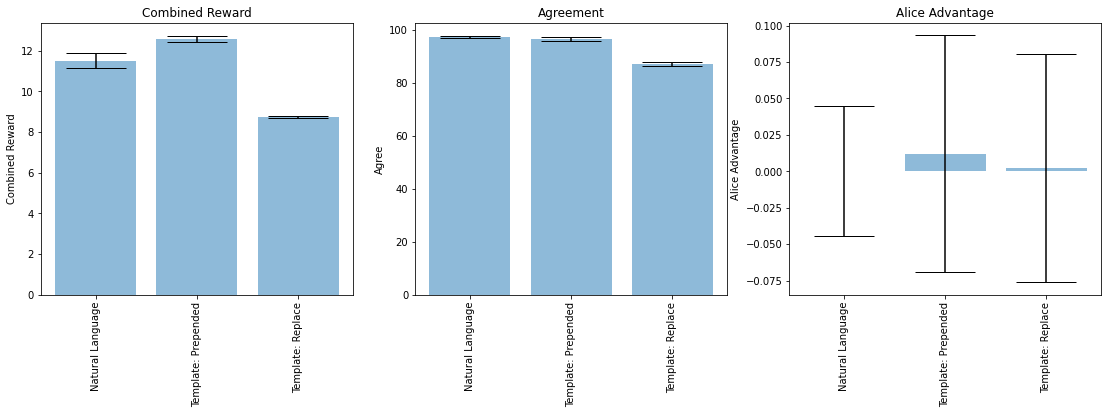

In [83]:
labs = means.index

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(19,5))
col = 'comb_rew'
val = means[col]
err = stds[col]
ax = axs[0]
ax.bar(np.arange(len(labs)), val, yerr=err, align='center', alpha=0.5, ecolor='black', capsize=30)
ax.set_ylabel('Combined Reward')
ax.set_xticks(np.arange(len(labs)))
ax.set_xticklabels(labs, rotation=90)
ax.set_title('Combined Reward')
ax = axs[1]
col = 'agree'
val = means[col]
err = stds[col]
ax.bar(np.arange(len(labs)), val, yerr=err, align='center', alpha=0.5, ecolor='black', capsize=30)
ax.set_ylabel('Agree')
ax.set_xticks(np.arange(len(labs)))
ax.set_xticklabels(labs, rotation=90)
ax.set_title('Agreement')
ax = axs[2]
col = 'advantage'
val = means[col]
err = stds[col]
ax.bar(np.arange(len(labs)), val, yerr=err, align='center', alpha=0.5, ecolor='black', capsize=30)
ax.set_ylabel('Alice Advantage')
ax.set_xticks(np.arange(len(labs)))
ax.set_xticklabels(labs, rotation=90)
ax.set_title('Alice Advantage')
plt.show()


In [81]:
means

,dialog_len,sent_len,agree,moving_agree,advantage,moving_advantage,time,comb_rew,agree_comb_rew,pareto_opt,alice_rew,alice_moving_rew,agree_alice_rew,alice_sel,alice_unique,bob_rew,bob_moving_rew,agree_bob_rew,bob_sel,bob_unique
type,,,,,,,,,,,,,,,,,,,,
Natural Language,3.792,5.814,97.330,96.6,6.938894e-19,-0.186,0.0228,11.506,11.820,47.452,5.752,5.716,5.910,49.906,1883.4,5.754,5.780,5.912,50.096,1863.8
Template: Prepended,3.894,9.772,96.552,96.4,1.200000e-02,0.022,0.0306,12.596,13.046,58.950,6.302,6.494,6.528,50.082,1893.4,6.294,6.400,6.516,49.922,1906.0
Template: Replace,5.172,4.968,87.034,87.4,2.000000e-03,0.146,0.0296,8.752,10.056,26.598,4.376,4.360,5.028,50.004,412.2,4.372,4.304,5.026,49.996,425.8
